# Evaluate the risk identification on Hutchison dataset


Validating on dataset used in

Nora Hutchinson, Hannah Moyer, Deborah A Zarin, Jonathan Kimmelman, The proportion of randomized controlled trials that inform clinical practice eLife 11:e79491 (2022)


https://doi.org/10.7554/eLife.79491

Dataset available at https://osf.io/rk42h

In [1]:
import sys
sys.path.append('../front_end')

import pandas as pd
from sklearn.metrics import accuracy_score
import os
from util.protocol_master_processor import MasterProcessor
from util.risk_assessor import calculate_risk_level
import re
from util.parameter_provider import DefaultParameterProvider
from util.tertile_provider import DefaultSampleSizeTertileProvider
from util.get_phase_tertiles import get_tertile

2023-02-13 00:25:50.035667: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-13 00:25:50.181275: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-13 00:25:50.181290: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-13 00:25:50.213781: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-02-13 00:25:51.103491: W tensorflow/stream_executor/platform/de

In [2]:
df_testing = pd.read_excel("Trials that Inform Clinical Practice Spreadsheet.xlsx")

In [3]:
df_annotations = pd.read_csv("../data/ctgov/annotations/all_annotations.csv")

In [4]:
cwd = os.getcwd()

In [5]:
# If there were non-HIV or non-TB trials which are not in the main dataset but which featured in Hutchison et al's dataset, add these protocols here
import os
extra_nct_ids= []
extra_files = []
for f in os.listdir(cwd + "/extra_data_hutchison"):
    nct_id = re.sub(r'.+NCT', 'NCT', f)
    nct_id = re.sub(r'_.+', '', nct_id)
    extra_nct_ids.append(nct_id)
    extra_files.append(cwd + "/extra_data_hutchison/" + f)
df_annotations = pd.concat([df_annotations, pd.DataFrame({"nct_id": extra_nct_ids, "file":extra_files})])

In [6]:
df_annotations.set_index("nct_id", inplace=True)

In [7]:
os.chdir('../front_end')

In [8]:
tertile_finder = DefaultSampleSizeTertileProvider("sample_size_tertiles.csv")

parameter_provider = DefaultParameterProvider("parameter_weights.csv")

In [9]:
master_processor = MasterProcessor("models/condition_classifier.pkl.bz2",
                                   "models/phase_rf_classifier.pkl.bz2",
                                   "models/spacy-textcat-phase-04-model-best",
                                   "models/sap_classifier_document_level.pkl.bz2",
                                   "models/sap_classifier.pkl.bz2",
                                   "models/effect_estimate_classifier.pkl.bz2",
                                   "models/num_subjects_classifier.pkl.bz2",
                                   "models/subjects_classifier_document_level.pkl.bz2",
                                   "models/arms_classifier_document_level.pkl.bz2",
                                   "models/spacy-textcat-arms-21-model-best",
                                   "models/spacy-textcat-international-11-model-best",
                                   "models/spacy-textcat-country-16-model-best",
                                   "models/international_classifier.pkl.bz2",
                                   "models/country_ensemble_model.pkl.bz2",
                                   "models/simulation_classifier.pkl.bz2")

Initialising Phase Random Forest classifier models/phase_rf_classifier.pkl.bz2


/media/thomas/642d0db5-2c98-4156-b591-1a3572c5868c/anaconda3/envs/protocols/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.1.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/media/thomas/642d0db5-2c98-4156-b591-1a3572c5868c/anaconda3/envs/protocols/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.1.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/media/thomas/642d0db5-2c98-4156-b591-1a3572c5868c/anaconda3/envs/protocols/lib/python3.10/site-pa

Initialising SAP document level classifier models/sap_classifier_document_level.pkl.bz2


/media/thomas/642d0db5-2c98-4156-b591-1a3572c5868c/anaconda3/envs/protocols/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator CountVectorizer from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/media/thomas/642d0db5-2c98-4156-b591-1a3572c5868c/anaconda3/envs/protocols/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator TfidfTransformer from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/media/thomas/642d0db5-2c98-4156-b591-1a3572c5868c/anaconda3/envs/protocols/lib/python3.10/site-packages/sklear

Initialising Num Arms classifier models/arms_classifier_document_level.pkl.bz2
Initialising int classifier models/international_classifier.pkl.bz2


/media/thomas/642d0db5-2c98-4156-b591-1a3572c5868c/anaconda3/envs/protocols/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator BernoulliNB from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [10]:
len(df_annotations)

11925

In [11]:
not_found = set()
ctgov_n = []
ctgov_sap = []
ctgov_countries = []
is_include = []
for idx in range(len(df_testing)):
    nct = df_testing.NCT.iloc[idx]
    n = None
    sap = None
    if nct in df_annotations.index:
        n = df_annotations.num_subjects[nct]
        sap = df_annotations.has_sap[nct]
        countries = df_annotations.country[nct]
        is_found = True
    else:
        not_found.add(nct)
        n = None
        sap = None
        countries = None
        is_found = False
    ctgov_n.append(n)
    ctgov_sap.append(sap)
    ctgov_countries.append(countries)
    is_include.append(is_found)
df_testing.insert(df_testing.columns.get_loc("Anticipated_Enroll") + 1, "CTGov_N", ctgov_n)
df_testing.insert(df_testing.columns.get_loc("Anticipated_Enroll") + 1, "CTGov_SAP", ctgov_sap)
df_testing.insert(df_testing.columns.get_loc("Anticipated_Enroll") + 1, "CTGov_countries", ctgov_countries)
df_testing["is_include"] = is_include

In [12]:
df_testing= df_testing[df_testing["is_include"]]

In [13]:
len(df_annotations.index)

11925

In [14]:
df_testing

,NCT,Disease,Intervention,Outcome,Sponsor,Status,Phase,Actual_Enroll,Anticipated_Enroll,CTGov_countries,CTGov_SAP,CTGov_N,Informative,Informative_Condition_Not_Met,is_include
32,NCT00946712,LUNG,Drug,Clinical,Other,"Active, Not Recruiting",3.0,1333,1546,"US,MX",1.0,1333.0,0,Design,True
56,NCT01032629,DIAB,Drug,Clinical,Industry,Completed,3.0,4330,4500,"US,AR,AU,BE,CA,CO,CZ,EE,FR,DE,HU,IN,IL,LU,MY,M...",0.0,4330.0,1,None,True
79,NCT01107626,LUNG,Drug,Clinical,Other,"Active, Not Recruiting",3.0,1516,1282,US,1.0,1516.0,0,Feasibility,True
87,NCT01144338,DIAB,Drug,Clinical,Industry,Completed,3.0,14752,9500,"US,AR,AU,AT,BE,BR,BG,CA,CL,CN,CO,CZ,DE,HK,HU,I...",0.0,14752.0,1,None,True
104,NCT01205776,CVS,Device,Clinical,Industry,Completed,NaN,1905,2634,NaN,NaN,NaN,0,Feasibility,True
105,NCT01206062,CVS,Other,Clinical,Other,Completed,NaN,9361,9250,US,0.0,9361.0,0,Design,True


In [15]:
file_to_page = {}
import json
texts = []
file_names = []
for idx in range(len(df_testing)):
    nct = df_testing.NCT.iloc[idx]
    file_name = None
    if nct in df_annotations.index:
        file_name = df_annotations.file[nct]
        if not "/" in file_name:
            file_name = "../data/ctgov/json/" + file_name + ".json"
    with open(file_name, "r", encoding="utf-8") as f:
        pages = json.load(f)
    texts.append(pages)
    file_names.append(file_name)
    file_to_page[file_name] = pages
df_testing["pages"] = texts
df_testing["file_name"] = file_names

In [16]:
pred_cond = []
pred_phase = []
pred_arms = []
pred_sap = []
pred_subjects = []
pred_sim = []
pred_effect = []
pred_countries = []

pred_scores = []
pred_dfs = []
pred_descriptions = []

for idx in range(len(df_testing)):
    tokenised_pages, condition_to_pages, phase_to_pages, sap_to_pages, \
               effect_estimate_to_pages, num_subjects_to_pages,\
    num_arms_to_pages, country_to_pages, simulation_to_pages = master_processor.process_protocol(df_testing["pages"].iloc[idx])
    pred_cond.append(condition_to_pages["prediction"])
    pred_phase.append(phase_to_pages["prediction"])
    pred_arms.append(num_arms_to_pages["prediction"])
    pred_sap.append(sap_to_pages["prediction"])
    pred_subjects.append(num_subjects_to_pages["prediction"])    
    pred_sim.append(simulation_to_pages["prediction"])    
    pred_effect.append(effect_estimate_to_pages["prediction"])        
    pred_countries.append(country_to_pages["prediction"])        
    
    file_name = df_testing["file_name"].iloc[idx]
    condition = condition_to_pages["prediction"]
    phase = phase_to_pages["prediction"]
    sap = sap_to_pages["prediction"]
    effect_estimate = effect_estimate_to_pages["prediction"]
    num_subjects = num_subjects_to_pages["prediction"]

    condition_for_tertile = condition
    if condition_for_tertile != "HIV" and condition_for_tertile != "TB":
        condition_for_tertile = "HIV"
    lower_tertile, upper_tertile = get_tertile(tertile_finder, condition_for_tertile, phase)
    if num_subjects < lower_tertile:
        num_subjects_tertile = 0
    elif num_subjects < upper_tertile:
        num_subjects_tertile = 1
    else:
        num_subjects_tertile = 2

    num_subjects_and_tertile = [num_subjects, num_subjects_tertile, lower_tertile, upper_tertile]
    num_arms = num_arms_to_pages["prediction"]

    countries = country_to_pages["prediction"]
    is_international = int(len(countries) > 1)
    simulation = simulation_to_pages["prediction"]


    high_risk_threshold = int(parameter_provider.df.Value.iloc[0])
    low_risk_threshold = int(parameter_provider.df.Value.iloc[1])
    weight_number_of_arms = float(parameter_provider.df.Value.iloc[2])
    weight_phase = float(parameter_provider.df.Value.iloc[3])
    weight_sap = float(parameter_provider.df.Value.iloc[4])
    weight_effect_estimate = float(parameter_provider.df.Value.iloc[5])
    weight_num_subjects = float(parameter_provider.df.Value.iloc[6])
    weight_international = float(parameter_provider.df.Value.iloc[7])
    weight_simulation = float(parameter_provider.df.Value.iloc[8])
    weight_bias = float(parameter_provider.df.Value.iloc[9])

    total_score, df, description = calculate_risk_level(file_name, condition, phase, sap, effect_estimate,
                                                                    num_subjects_and_tertile,
                                                                    num_arms,
                                                                    is_international, simulation,
                                                                    high_risk_threshold,
                                                                    low_risk_threshold,
                                                                    weight_number_of_arms,
                                                                    weight_phase,
                                                                    weight_sap,
                                                                    weight_effect_estimate,
                                                                    weight_num_subjects,
                                                                    weight_international,
                                                                    weight_simulation,
                                                                    weight_bias,
                                                                    )
    
    pred_scores.append(total_score)
    pred_dfs.append(df)
    pred_descriptions.append(description)

Splitting the document into words (tokens)...
There were 43111 words in the document.

Searching for a likely pathology...
This looks like an HIV trial.

Searching for a phase...
This looks like a Phase 3.0 trial.

Neural network thought it was a Phase 2.0 trial.

Searching for a statistical analysis plan...
It does not look like the protocol contains a statistical analysis plan.

Testing top pages for SAP with document level SAP Naive Bayes model to refine SAP prediction.

Document level Naive Bayes model found SAP score 1 with score 0.6793867534327842.

Searching for an effect estimate...


/media/thomas/642d0db5-2c98-4156-b591-1a3572c5868c/anaconda3/envs/protocols/lib/python3.10/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Identified probable effect estimate.

Naive Bayes arms prediction probabilities: {'1': 0.6406306225345821, '2': 0.25216343920523177, '3+': 0.10720593826018858}.

Spacy arms prediction probabilities: {'1': 0.9999986886978149, '2': 1.3110779946146067e-06, '3+': 3.7653871687304274e-10}.

Searching for a number of arms...
No explicit mention of arms found.

Running Random Forest classifier for number of subjects...
Searching for a number of subjects...
It looks like the trial has 40 participants.

Searching for the countries of investigation...
It looks like the trial takes place in 2 countries: US,CA

Neural network found that trial country is likely to be USCA.

Neural network for is trial international? output: 0.

Naive Bayes model for is trial international? output: 0.

Ensemble model output: {"prediction": ["US", "CA"], "score": {"US": 0.73, "XX": 0.05, "CA": 0.61, "GB": 0.01}}

Searching for any mentions of simulation...
The authors probably used simulation for sample size.

Splitti

/media/thomas/642d0db5-2c98-4156-b591-1a3572c5868c/anaconda3/envs/protocols/lib/python3.10/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Identified probable effect estimate.

Naive Bayes arms prediction probabilities: {'1': 0.04914145195950588, '2': 0.6221414833262942, '3+': 0.32871706471420054}.

Spacy arms prediction probabilities: {'1': 0.00019330611394252628, '2': 0.03457524627447128, '3+': 0.9652314186096191}.

Searching for a number of arms...
No explicit mention of arms found.

Running Random Forest classifier for number of subjects...
Searching for a number of subjects...
It looks like the trial has 4500 participants.

Searching for the countries of investigation...
It looks like the trial takes place in 1 country: US

Neural network found that trial country is likely to be LMIC.

Neural network for is trial international? output: 1.

Naive Bayes model for is trial international? output: 1.

Ensemble model output: {"prediction": ["US", "XX", "AU", "MX", "SE", "GB"], "score": {"US": 0.86, "XX": 0.7, "AU": 0.37285714285714283, "MX": 0.31285714285714283, "SE": 0.23, "GB": 0.23}}

Searching for any mentions of simul

/media/thomas/642d0db5-2c98-4156-b591-1a3572c5868c/anaconda3/envs/protocols/lib/python3.10/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Naive Bayes arms prediction probabilities: {'1': 0.7320905692598502, '2': 0.1875224402487277, '3+': 0.08038699049142563}.

Spacy arms prediction probabilities: {'1': 0.9999995231628418, '2': 3.6612709664041176e-07, '3+': 8.847685961654861e-08}.

Searching for a number of arms...
No explicit mention of arms found.

Running Random Forest classifier for number of subjects...
Searching for a number of subjects...
It looks like the trial has 878 participants.

Searching for the countries of investigation...
It looks like the trial takes place in 1 country: US

Neural network found that trial country is likely to be USCA.

Neural network for is trial international? output: 0.

Naive Bayes model for is trial international? output: 0.

Ensemble model output: {"prediction": ["US", "CA"], "score": {"US": 0.78, "XX": 0.05, "CA": 0.53}}

Searching for any mentions of simulation...
It does not look like the authors used simulation for sample size.

Splitting the document into words (tokens)...
Ther

/media/thomas/642d0db5-2c98-4156-b591-1a3572c5868c/anaconda3/envs/protocols/lib/python3.10/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Naive Bayes arms prediction probabilities: {'1': 0.05246690385188766, '2': 0.6428173874514175, '3+': 0.30471570869669573}.

Spacy arms prediction probabilities: {'1': 4.810234377700465e-14, '2': 0.9999998807907104, '3+': 6.235655547470742e-08}.

Searching for a number of arms...
It looks like the trial has 2 arm(s).

The NB prediction and the rule based prediction match!
Running Random Forest classifier for number of subjects...
Searching for a number of subjects...
It looks like the trial has 14000 participants.

Searching for the countries of investigation...
It looks like the trial takes place in 1 country: ZA

Neural network found that trial country is likely to be HIGH_INCOME.

Neural network for is trial international? output: 1.

Naive Bayes model for is trial international? output: 0.

Ensemble model output: {"prediction": ["US", "CA"], "score": {"ZA": 0.21, "XX": 0.1, "GB": 0.06, "US": 0.81, "PR": 0.18, "CA": 0.64}}

Searching for any mentions of simulation...
It does not look

/media/thomas/642d0db5-2c98-4156-b591-1a3572c5868c/anaconda3/envs/protocols/lib/python3.10/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Identified probable effect estimate.

Naive Bayes arms prediction probabilities: {'1': 0.11711545414712982, '2': 0.669589648751176, '3+': 0.21329489710169544}.

Spacy arms prediction probabilities: {'1': 6.913509348338565e-11, '2': 0.9999959468841553, '3+': 4.00740191253135e-06}.

Searching for a number of arms...
No explicit mention of arms found.

Running Random Forest classifier for number of subjects...
Searching for a number of subjects...
It looks like the trial has 1900 participants.

Searching for the countries of investigation...
It looks like the trial takes place in 5 countries: NL,AU,US,CA,KR

Neural network found that trial country is likely to be USCA.

Neural network for is trial international? output: 1.

Naive Bayes model for is trial international? output: 0.

Ensemble model output: {"prediction": ["US"], "score": {"US": 0.78, "XX": 0.3, "NL": 0.36, "CA": 0.28, "KR": 0.29, "AU": 0.29, "SE": 0.36, "GB": 0.41}}

Searching for any mentions of simulation...
The authors pr

/media/thomas/642d0db5-2c98-4156-b591-1a3572c5868c/anaconda3/envs/protocols/lib/python3.10/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Identified probable effect estimate.

Naive Bayes arms prediction probabilities: {'1': 0.0780713760066434, '2': 0.691265584289764, '3+': 0.230663039703593}.

Spacy arms prediction probabilities: {'1': 5.498677952067423e-19, '2': 1.0, '3+': 7.21970039307962e-09}.

Searching for a number of arms...
No explicit mention of arms found.

Running Random Forest classifier for number of subjects...
Searching for a number of subjects...
It looks like the trial has 9250 participants.

Searching for the countries of investigation...
It looks like the trial takes place in 1 country: US

Neural network found that trial country is likely to be USCA.

Neural network for is trial international? output: 0.

Naive Bayes model for is trial international? output: 0.

Ensemble model output: {"prediction": ["US"], "score": {"US": 0.94, "XX": 0.0, "AU": 0.11, "GB": 0.1, "CN": 0.02}}

Searching for any mentions of simulation...
The authors probably used simulation for sample size.



In [17]:
pred_risk_category = []
for d in pred_descriptions:
    c = None
    for l in d:
        if "HIGH" in l:
            c = "HIGH"
        elif "MEDIUM" in l:
            c = "MEDIUM"
        elif "LOW" in l:
            c = "LOW"
    pred_risk_category.append(c)

In [18]:
df_testing["AI_Indication_v2"] = pred_cond
df_testing["AI_phase_v2"] = pred_phase
df_testing["AI_arms_v2"] = pred_arms
df_testing["AI_SAP_v2"] = pred_sap
df_testing["AI_N_v2"] = pred_subjects
df_testing["AI_effect_v2"] = pred_effect
df_testing["AI_sim_v2"] = pred_sim
df_testing["AI_countries_v2"] = [",".join(sorted(set(c))) for c in pred_countries]
df_testing["AI_Indication_v2"] = pred_cond
df_testing["AI_risk_v2"] = pred_scores
df_testing["AI_risk_label_v2"] = pred_risk_category

In [19]:
df_testing.columns

Index(['NCT', 'Disease', 'Intervention', 'Outcome', 'Sponsor', 'Status',
       'Phase', 'Actual_Enroll', 'Anticipated_Enroll', 'CTGov_countries',
       'CTGov_SAP', 'CTGov_N', 'Informative', 'Informative_Condition_Not_Met',
       'is_include', 'pages', 'file_name', 'AI_Indication_v2', 'AI_phase_v2',
       'AI_arms_v2', 'AI_SAP_v2', 'AI_N_v2', 'AI_effect_v2', 'AI_sim_v2',
       'AI_countries_v2', 'AI_risk_v2', 'AI_risk_label_v2'],
      dtype='object')

In [20]:
df_testing.Informative

32     0
56     1
79     0
87     1
104    0
105    0
Name: Informative, dtype: int64

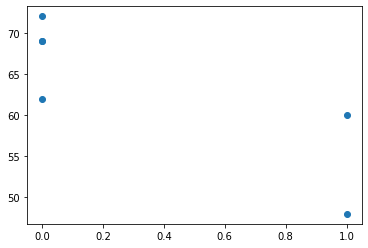

In [21]:
import matplotlib.pyplot as plt
plt.scatter(df_testing.Informative, df_testing.AI_risk_v2)

In [22]:
df_testing

,NCT,Disease,Intervention,Outcome,Sponsor,Status,Phase,Actual_Enroll,Anticipated_Enroll,CTGov_countries,...,AI_Indication_v2,AI_phase_v2,AI_arms_v2,AI_SAP_v2,AI_N_v2,AI_effect_v2,AI_sim_v2,AI_countries_v2,AI_risk_v2,AI_risk_label_v2
32,NCT00946712,LUNG,Drug,Clinical,Other,"Active, Not Recruiting",3.0,1333,1546,"US,MX",...,HIV,3.0,1,1,40,1,1,"CA,US",72,LOW
56,NCT01032629,DIAB,Drug,Clinical,Industry,Completed,3.0,4330,4500,"US,AR,AU,BE,CA,CO,CZ,EE,FR,DE,HU,IN,IL,LU,MY,M...",...,HIV,3.0,3,0,4500,1,0,"AU,GB,MX,SE,US,XX",60,LOW
79,NCT01107626,LUNG,Drug,Clinical,Other,"Active, Not Recruiting",3.0,1516,1282,US,...,HIV,3.0,1,1,878,1,0,"CA,US",62,LOW
87,NCT01144338,DIAB,Drug,Clinical,Industry,Completed,3.0,14752,9500,"US,AR,AU,AT,BE,BR,BG,CA,CL,CN,CO,CZ,DE,HK,HU,I...",...,Other,1.0,2,0,14000,1,0,"CA,US",48,MEDIUM
104,NCT01205776,CVS,Device,Clinical,Industry,Completed,NaN,1905,2634,NaN,...,Other,4.0,2,1,1900,1,1,US,69,LOW
105,NCT01206062,CVS,Other,Clinical,Other,Completed,NaN,9361,9250,US,...,Other,0.0,2,1,9250,1,1,US,69,LOW


In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(df_testing.Informative, 100 - df_testing.AI_risk_v2)
roc_auc = auc(fpr, tpr)
print(f"\tAUC is {auc(fpr, tpr):.2f}")

	AUC is 1.00


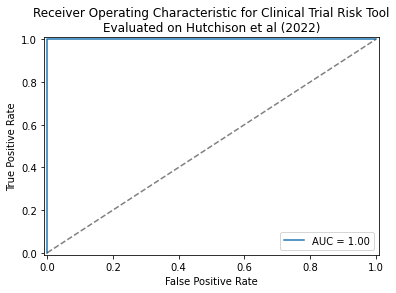

In [24]:
plt.plot(fpr, tpr, label = f'AUC = {roc_auc:0.2f}')
plt.title(f'Receiver Operating Characteristic for Clinical Trial Risk Tool\nEvaluated on Hutchison et al (2022)')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'--', color='black', alpha=0.5)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

In [25]:
accuracies = {}

In [26]:
phase_map = {"1/2":"0.5"}

accuracies['AI_phase_v2'] = accuracy_score(df_testing.Phase.apply(str).apply(lambda x : re.sub(r'\.0', '', x)), df_testing.AI_phase_v2.apply(str).apply(lambda x : re.sub(r'\.0', '', x)))

print (f"Phase accuracy v2: {accuracies['AI_phase_v2']}")

Phase accuracy v2: 0.5


In [27]:
accuracies['AI_risk_label_v2'] = accuracy_score(df_testing.Informative, df_testing.AI_risk_label_v2 == "LOW")

print (f"Risk label accuracy v2: {accuracies['AI_risk_label_v2']}")

Risk label accuracy v2: 0.16666666666666666


In [28]:
df_subtotals = pd.DataFrame()
for idx, c in enumerate(df_testing.columns):
    last_row = ""
    if idx == 0:
        last_row = "ACCURACY"
    elif c in accuracies:
        last_row = accuracies[c]
    
    df_subtotals[c] = ["", last_row]

In [29]:
df_testing_with_subtotals = pd.concat([df_testing, df_subtotals]).drop(columns="pages")

In [30]:
df_testing_with_subtotals

,NCT,Disease,Intervention,Outcome,Sponsor,Status,Phase,Actual_Enroll,Anticipated_Enroll,CTGov_countries,...,AI_Indication_v2,AI_phase_v2,AI_arms_v2,AI_SAP_v2,AI_N_v2,AI_effect_v2,AI_sim_v2,AI_countries_v2,AI_risk_v2,AI_risk_label_v2
32,NCT00946712,LUNG,Drug,Clinical,Other,"Active, Not Recruiting",3.0,1333,1546,"US,MX",...,HIV,3.0,1,1,40,1,1,"CA,US",72,LOW
56,NCT01032629,DIAB,Drug,Clinical,Industry,Completed,3.0,4330,4500,"US,AR,AU,BE,CA,CO,CZ,EE,FR,DE,HU,IN,IL,LU,MY,M...",...,HIV,3.0,3,0,4500,1,0,"AU,GB,MX,SE,US,XX",60,LOW
79,NCT01107626,LUNG,Drug,Clinical,Other,"Active, Not Recruiting",3.0,1516,1282,US,...,HIV,3.0,1,1,878,1,0,"CA,US",62,LOW
87,NCT01144338,DIAB,Drug,Clinical,Industry,Completed,3.0,14752,9500,"US,AR,AU,AT,BE,BR,BG,CA,CL,CN,CO,CZ,DE,HK,HU,I...",...,Other,1.0,2,0,14000,1,0,"CA,US",48,MEDIUM
104,NCT01205776,CVS,Device,Clinical,Industry,Completed,NaN,1905,2634,NaN,...,Other,4.0,2,1,1900,1,1,US,69,LOW
105,NCT01206062,CVS,Other,Clinical,Other,Completed,NaN,9361,9250,US,...,Other,0.0,2,1,9250,1,1,US,69,LOW
0,,,,,,,,,,,...,,,,,,,,,,
1,ACCURACY,,,,,,,,,,...,,0.5,,,,,,,,0.166667


In [31]:
df_testing_with_subtotals.to_excel(cwd + "/validation_hutchison.xlsx", index=False)

In [33]:
df_testing_with_subtotals.to_markdown(cwd + "/validation_hutchison.md", index=False)